In [49]:
from google.colab import drive
drive.mount('/content/drive')
!cp -r "/content/drive/My Drive/depth_code/." "/content"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
from torch.autograd import Variable
from torch.utils import data
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import time
import sys
import torchvision.models as models
import random

import networks
#from refinenet import *
##### Checking for cuda 
if torch.cuda.is_available():
        device = torch.device("cuda")
else:
        device = torch.device("cpu")

In [51]:
#DEPTH NETWORK

model_path = "/content"

encoder_path = os.path.join(model_path, "encoder.pth")
depth_decoder_path = os.path.join(model_path, "depth.pth")

# LOADING PRETRAINED MODEL
print("   Loading pretrained encoder")
encoder = networks.ResnetEncoder(18, False)
loaded_dict_enc = torch.load(encoder_path, map_location=device)
# extract the height and width of image that this model was trained with
feed_height = loaded_dict_enc['height']
feed_width = loaded_dict_enc['width']
filtered_dict_enc = {k: v for k, v in loaded_dict_enc.items() if k in encoder.state_dict()}
encoder.load_state_dict(filtered_dict_enc)
#Encoder for depth
encoder.to(device)

print("   Loading pretrained decoder")
depth_decoder = networks.DepthDecoder(
num_ch_enc=encoder.num_ch_enc, scales=range(4))

loaded_dict = torch.load(depth_decoder_path, map_location=device)
depth_decoder.load_state_dict(loaded_dict)

#Decoder for depth
depth_decoder.to(device)

   Loading pretrained encoder
   Loading pretrained decoder


DepthDecoder(
  (decoder): ModuleList(
    (0): ConvBlock(
      (conv): Conv3x3(
        (pad): ReflectionPad2d((1, 1, 1, 1))
        (conv): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1))
      )
      (nonlin): ELU(alpha=1.0, inplace=True)
    )
    (1): ConvBlock(
      (conv): Conv3x3(
        (pad): ReflectionPad2d((1, 1, 1, 1))
        (conv): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1))
      )
      (nonlin): ELU(alpha=1.0, inplace=True)
    )
    (2): ConvBlock(
      (conv): Conv3x3(
        (pad): ReflectionPad2d((1, 1, 1, 1))
        (conv): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1))
      )
      (nonlin): ELU(alpha=1.0, inplace=True)
    )
    (3): ConvBlock(
      (conv): Conv3x3(
        (pad): ReflectionPad2d((1, 1, 1, 1))
        (conv): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1))
      )
      (nonlin): ELU(alpha=1.0, inplace=True)
    )
    (4): ConvBlock(
      (conv): Conv3x3(
        (pad): ReflectionPad2d((1, 1, 1, 1))
        (conv

In [0]:
image_path = "/content/drive/My Drive/2_2_images/2_2_gan/300.jpg"
im = Image.open(image_path)
im = torchvision.transforms.functional.resize(im, (feed_height,feed_width), interpolation=2)
im = torch.unsqueeze(transforms.ToTensor()(im),dim=0).to(device)
depth = depth_decoder(encoder(im))

In [0]:
disp = depth[("disp", 0)]

In [0]:
img = torchvision.transforms.ToPILImage(mode=None)(torch.squeeze(disp,dim=0))

In [0]:
img.save("depth_10.png")

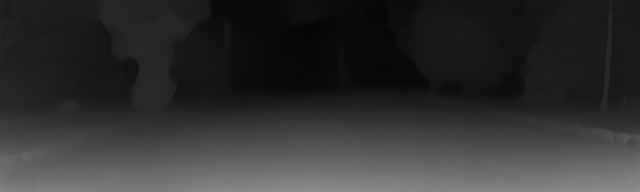

In [48]:
img